# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Game Analysis/Data/battleground.csv")

In [31]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


# Data Preprocessing

## 비인가 프로그램 사용 유저 정의

winPlacePerc = 1은 우승을 의미한다.

우승 유저 가운데 aim_point가 이상치인 경우를 비인가 프로그램 사용 유저라고 정의했다.

보통 핵 쓰는 유저가 치킨을 뜯는다고 생각했기 때문(실제 나도 최후 2인까지 가서 죽은 경우가 많은데, 리플레이를 보면 핵으로 인해 죽은 경우가 상당히 많았다. 빡치네..)

In [32]:
df['aim_point'] = df['headshotKills']/df['kills']
df['aim_point'] = df['aim_point'].fillna(0)

킬수가 전부 헤드샷 킬수인 경우

헤드샷 킬수 / 실제 킬수로 정의하였다. 배그는 총기 반동이 심하기 때문에 헤드샷이 쉽지만은 않다. 보통 애땁, 카98 등 저격총을 이용해서 헤드샷 킬이 잘 나오긴 하지만, 그것마저 흔한 킬이 아니라고 생각했기 때문에, 위의 비율을 봤을때 비정상적으로 헤드샷 킬이 크다면 에임핵을 의심할 수 있다.

In [33]:
df = df[df.winPlacePerc == 1]

In [36]:
df=df.reset_index().drop('index', axis=1)

# EDA

In [37]:
hack = df[df['aim_point'] == 1]
normal = df[df['aim_point'] != 1]

## 정상과 핵 유저의 플레이 타입

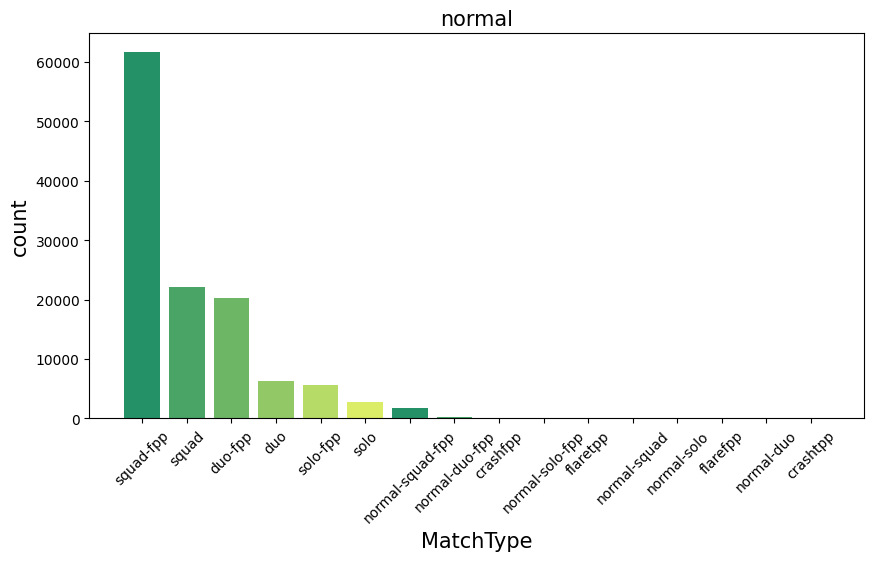

In [38]:
plt.figure(figsize=(10, 5))
colors = sns.color_palette('summer')
plt.bar(normal.matchType.value_counts().index, normal.matchType.value_counts().values, color=colors)
plt.xticks(rotation=45)
plt.xlabel("MatchType", fontsize=15)
plt.ylabel("count", fontsize = 15)
plt.title("normal", fontsize = 15)
plt.show()

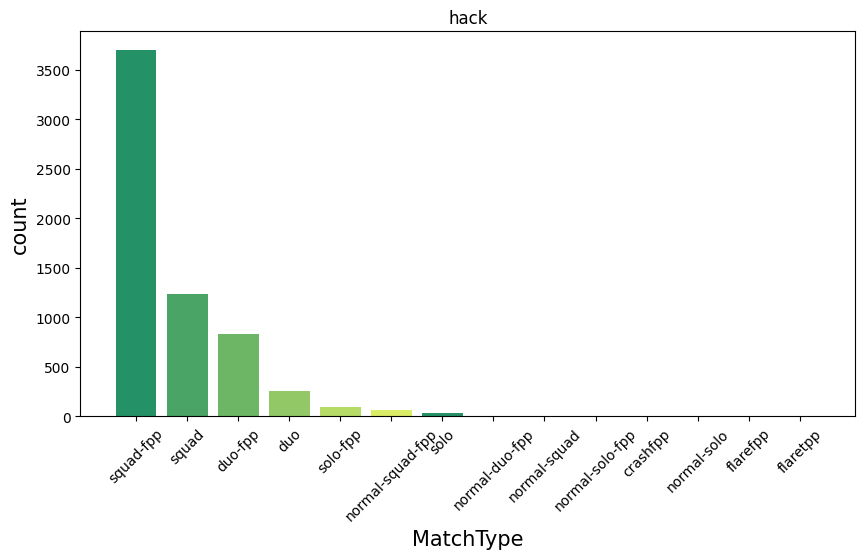

In [39]:
plt.figure(figsize=(10, 5))
colors = sns.color_palette('summer')
plt.bar(hack.matchType.value_counts().index, hack.matchType.value_counts().values, color=colors)
plt.xticks(rotation=45)
plt.xlabel("MatchType", fontsize=15)
plt.ylabel("count", fontsize = 15)
plt.title("hack")
plt.show()

## 정상과 핵 유저의 흭득 무기수


<br>
가설: 핵유저는 파밍을 많이 하지 않을 것이다.

* 오로지 aim에만 의존하기 때문

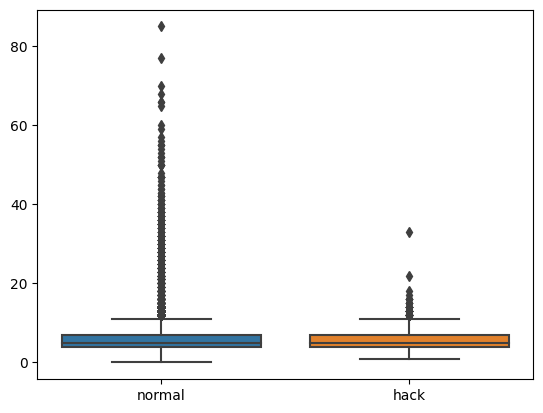

In [40]:
idx = np.arange(0, 2)
labels = ['normal', 'hack']

sns.boxplot([normal.weaponsAcquired,hack.weaponsAcquired])
plt.xticks(idx, labels)

plt.show()

In [41]:
# 중심극한정리에의해 표본평균의 분포가 정규분포를 따른다고 가정함

# 정규성을 만족할 때 등분산 검정(bartlett)
stats.levene(normal['weaponsAcquired'],
            hack['weaponsAcquired'])

# 등분산성을 만족하지 않는다.
# BartlettResult(statistic=24.538103476364096, pvalue=7.294767502746544e-07)

LeveneResult(statistic=24.538103476364096, pvalue=7.294767502746544e-07)

In [42]:
# ttest (유저에 따른 무기획득수 평균차이 검정)

print(normal['weaponsAcquired'].mean(),
      hack['weaponsAcquired'].mean())

# ttest에  equal_var = False를 추가하면 welch ttest
_, p = ttest_ind(normal['weaponsAcquired'],
                hack['weaponsAcquired'],  equal_var = False)
print(f'p={p:.3f}')


5.692319738881013 5.468714994399104
p=0.000


- 무기획득에 대한 평균 검정을 한 결과 p값이 0.05보다 작아 통계적으로 유의한 차이가 있음
- 가설대로 핵 유저의 무기획득의 평균 수가 적음을 확인함
-> 따라서 핵 유저는 파밍을 많이 하지 않는다.

ttest사용하는 이유 챗지피티한테 물어보고 잘 만들어보자 포트폴리오

## 정상과 핵 유저의 killStreaks 수 (짧은 시간 내에 동시 처치)

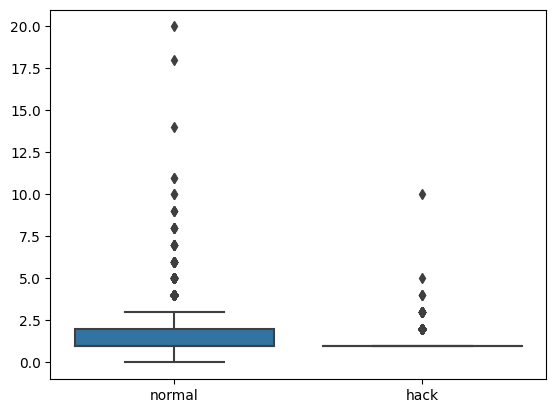

In [43]:
idx = np.arange(0, 2)
labels = ['normal', 'hack']

sns.boxplot([normal.killStreaks,hack.killStreaks])
plt.xticks(idx, labels)

plt.show()

In [44]:
# ttest (유저에 따른 평균 동시처치횟수 검정)
from scipy.stats import ttest_ind

print(normal['killStreaks'].mean(),
      hack['killStreaks'].mean())


_, p = ttest_ind(normal['killStreaks'],
                hack['killStreaks'],  equal_var = False)
print(f'p={p:.3f}')

1.3287725429428638 1.0800128020483277
p=0.000


- 핵 유저는 동시 처치가 거의 1에 수렴
- 동시 처치에 대한 평균검정을 한 결과 핵유저가 정상 유저에 비해 killSteaks가 적음(통계 유의)
-> 핵유저는 짧은 시간안에 여러 명을 죽일 수 없음

## 정상과 핵 유저의 revives시도

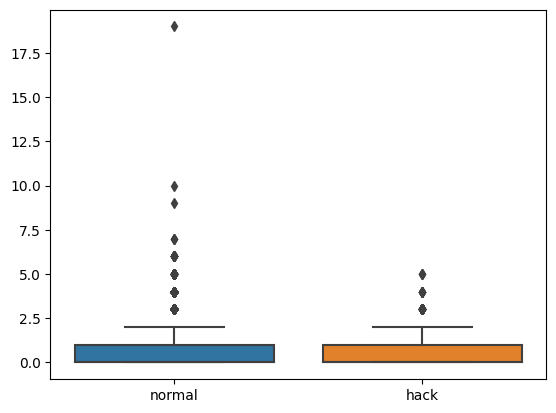

In [45]:
idx = np.arange(0, 2)
labels = ['normal', 'hack']

sns.boxplot([normal.revives,hack.revives])
plt.xticks(idx, labels)

plt.show()

In [46]:
# ttest (유저에따른 팀원을 살린 횟수 평균 검정)
from scipy.stats import ttest_ind

print(normal['revives'].mean(),
      hack['revives'].mean())


_, p = ttest_ind(normal['revives'],
                hack['revives'],  equal_var = False)
print(f'p={p:.3f}')

0.4871583528403284 0.3858217314770363
p=0.000


- 핵 유저의 소생 횟수가 정상 유저보다 더 적음(통계 유의)

## HeatMap

<Axes: >

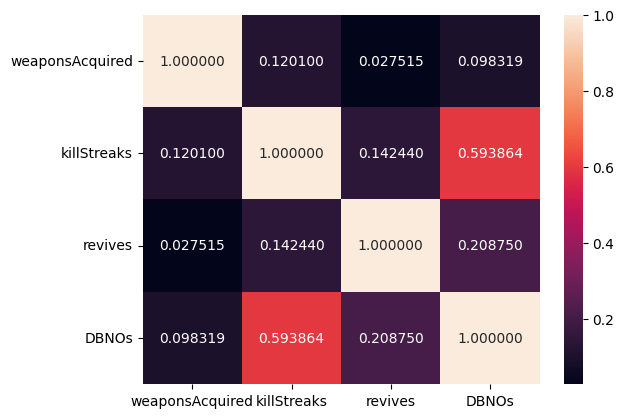

In [47]:
sns.heatmap(normal[['weaponsAcquired','killStreaks', 'revives', 'DBNOs']].corr(), annot=True, fmt='f')

<Axes: >

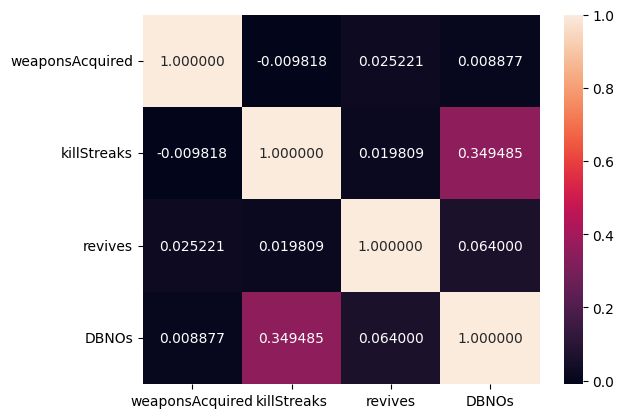

In [48]:
sns.heatmap(hack[['weaponsAcquired','killStreaks', 'revives', 'DBNOs']].corr(), annot=True, fmt='f')

- killStreaks와 DBNOs와의 상관계수 값이 정상유저가 어뷰징 유저보다 높음
-> 어뷰징유저는 헤드샷이 대부분이기 때문
-> 수류탄과 같은 기타무기를 사용하지 않고, 총으로만 상대했을 것

## 정상과 핵 유저의 어시스트 수

In [49]:
# ttest (유저에따른 어시스트 횟수 평균 검정)
from scipy.stats import ttest_ind

print(normal['assists'].mean(),
      hack['assists'].mean())


_, p = ttest_ind(normal['assists'],
                hack['assists'],  equal_var = False)
print(f'p={p:.3f}')

1.108997395404042 0.962393983037286
p=0.000


- 핵 유저의 어시스트 수가 더 적음

## 정상과 핵 유저의 도움 행위 수(boosts, heals)

가설: 무기 획득 수 대비 boosts+heals의 아이템 비율이 더 적을 것이다.

In [50]:
normal['not_weapon'] = (normal['boosts'] + normal['heals'])/normal['weaponsAcquired']
normal = normal.replace([np.inf, -np.inf], np.nan)
normal = normal.fillna(0)

hack['not_weapon'] = (hack['boosts'] + hack['heals'])/hack['weaponsAcquired']
hack = hack.replace([np.inf, -np.inf], np.nan)
hack = hack.fillna(0)

<ipython-input-50-f06a6222cfc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['not_weapon'] = (normal['boosts'] + normal['heals'])/normal['weaponsAcquired']
<ipython-input-50-f06a6222cfc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hack['not_weapon'] = (hack['boosts'] + hack['heals'])/hack['weaponsAcquired']


In [51]:
# ttest (유저에따른 아이템획득 비율 평균 검정)
from scipy.stats import ttest_ind

print(normal['not_weapon'].mean(),
      hack['not_weapon'].mean())


_, p = ttest_ind(normal['not_weapon'],
                 hack['not_weapon'],  equal_var = False)
print(f'p={p:.3f}')

1.4604191866466876 1.2802245955482239
p=0.000


- 핵 유저의 무기 획득 수가 더 낮고, 돕는 비율이 더 적음

## 정상과 핵 유저의 처치횟수 등수 분포

<ipython-input-52-f4b206a9ecf9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal['killPlace'],kde=True)
<ipython-input-52-f4b206a9ecf9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hack['killPlace'],kde=True)


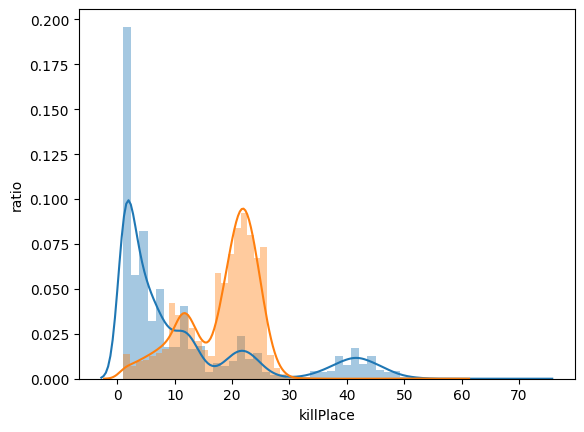

In [52]:
sns.distplot(normal['killPlace'],kde=True)
sns.distplot(hack['killPlace'],kde=True)

plt.xlabel("killPlace")
plt.ylabel("ratio")
plt.show()

- 핵 유저(주황), 정상 유저(파랑)의 분포를 봤을 때, 핵 유저는 상위 등수에 포진하고 있지는 않지만, 하위 등수에는 포진하는 경우아 아예 없음
- 정상 유저는 우승했음에도 하위 등수에 있는 경우가 있음(확실히 핵 유저에 비해 실력이 고르게 분포 즉, 치킨 뽀록이 터지는 경우도 빈번히 있다.)

## Insight

- 핵 유저는 파밍을 덜 한다.
- 총 파밍만 하기 때문에, 수류탄을 잘 사용하지 않는다. 따라서 동시 처지 횟수가 낮다.
- 소생, 회복 등 돕는 횟수가 적다.
- 핵 유저는 처치횟수 등수가 정상 유저에 비해 더 높은 편에 속한다.
- 정상 유저는 처지 등수가 낮음에도 불구하고 치킨을 먹는 경우가 종종있다. 즉, 존버는 승리한다.


# 비인가 프로그램 사용자 탐지

## Isolate Forest

In [23]:
from sklearn.ensemble import IsolationForest

isol = IsolationForest(n_estimators=500, max_samples = 0.3, random_state=123)

In [53]:
df['not_weapon'] = (df['boosts'] + df['heals'])/df['weaponsAcquired']
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

In [54]:
available = ['weaponsAcquired', 'kills', 'killStreaks', 'revives', 'DBNOs',
'assists', 'not_weapon', 'killPlace', 'aim_point']

data_x = df[available]
data_x.head()

,weaponsAcquired,kills,killStreaks,revives,DBNOs,assists,not_weapon,killPlace,aim_point
0,4,4,2,0,2,1,2.750000,4,0.750
1,7,0,0,0,0,1,0.428571,38,0.000
2,7,0,0,1,0,2,2.571429,45,0.000
3,7,6,2,0,4,1,1.571429,4,0.500
4,5,8,1,0,0,0,1.400000,2,0.375


In [55]:
isol_fit = isol.fit(data_x)
isol_pred = isol_fit.predict(data_x)

sum(isol_pred==-1)
# 1915 명

1915

In [57]:
itrain = df.copy()
itrain["isolation"] = isol_pred

isolated = itrain[itrain["isolation"] == -1]
isolated.head()

isol.decision_function(data_x)
# array([0.05579426, 0.05957289, 0.08520675, ..., 0.14555975, 0.12987898,
      #  0.04708703])

itrain['isol_prob'] = isol.decision_function(data_x)

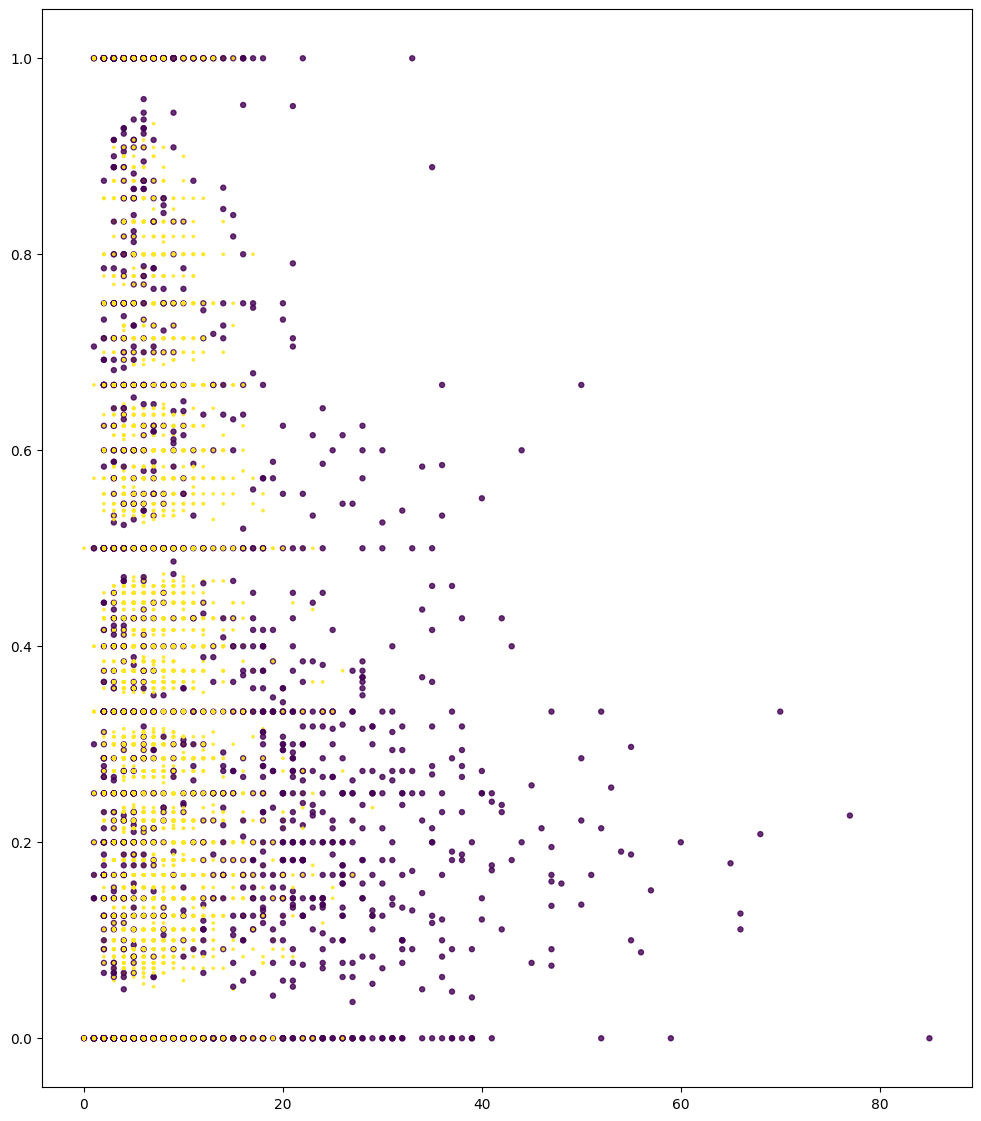

In [58]:
plt.figure(figsize=(12,14))
plt.scatter(itrain['weaponsAcquired'],itrain['aim_point'],
            c = itrain['isolation'], s=-5*itrain['isolation']+8, alpha=0.8)


## 이상치 유저 특징 분석

### 데미지 분석

<ipython-input-59-eec10353faa2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itrain[(itrain['isolation'] == -1)]['damageDealt'], color='tomato')
<ipython-input-59-eec10353faa2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itrain[(itrain['isolation'] == 1)]['damageDealt'], color='skyblue'

(array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
        0.0016, 0.0018]),
 [Text(0, 0.0, '0.0000'),
  Text(0, 0.0002, '0.0002'),
  Text(0, 0.0004, '0.0004'),
  Text(0, 0.0006000000000000001, '0.0006'),
  Text(0, 0.0008, '0.0008'),
  Text(0, 0.001, '0.0010'),
  Text(0, 0.0012000000000000001, '0.0012'),
  Text(0, 0.0014, '0.0014'),
  Text(0, 0.0016, '0.0016'),
  Text(0, 0.0018000000000000002, '0.0018')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*arg

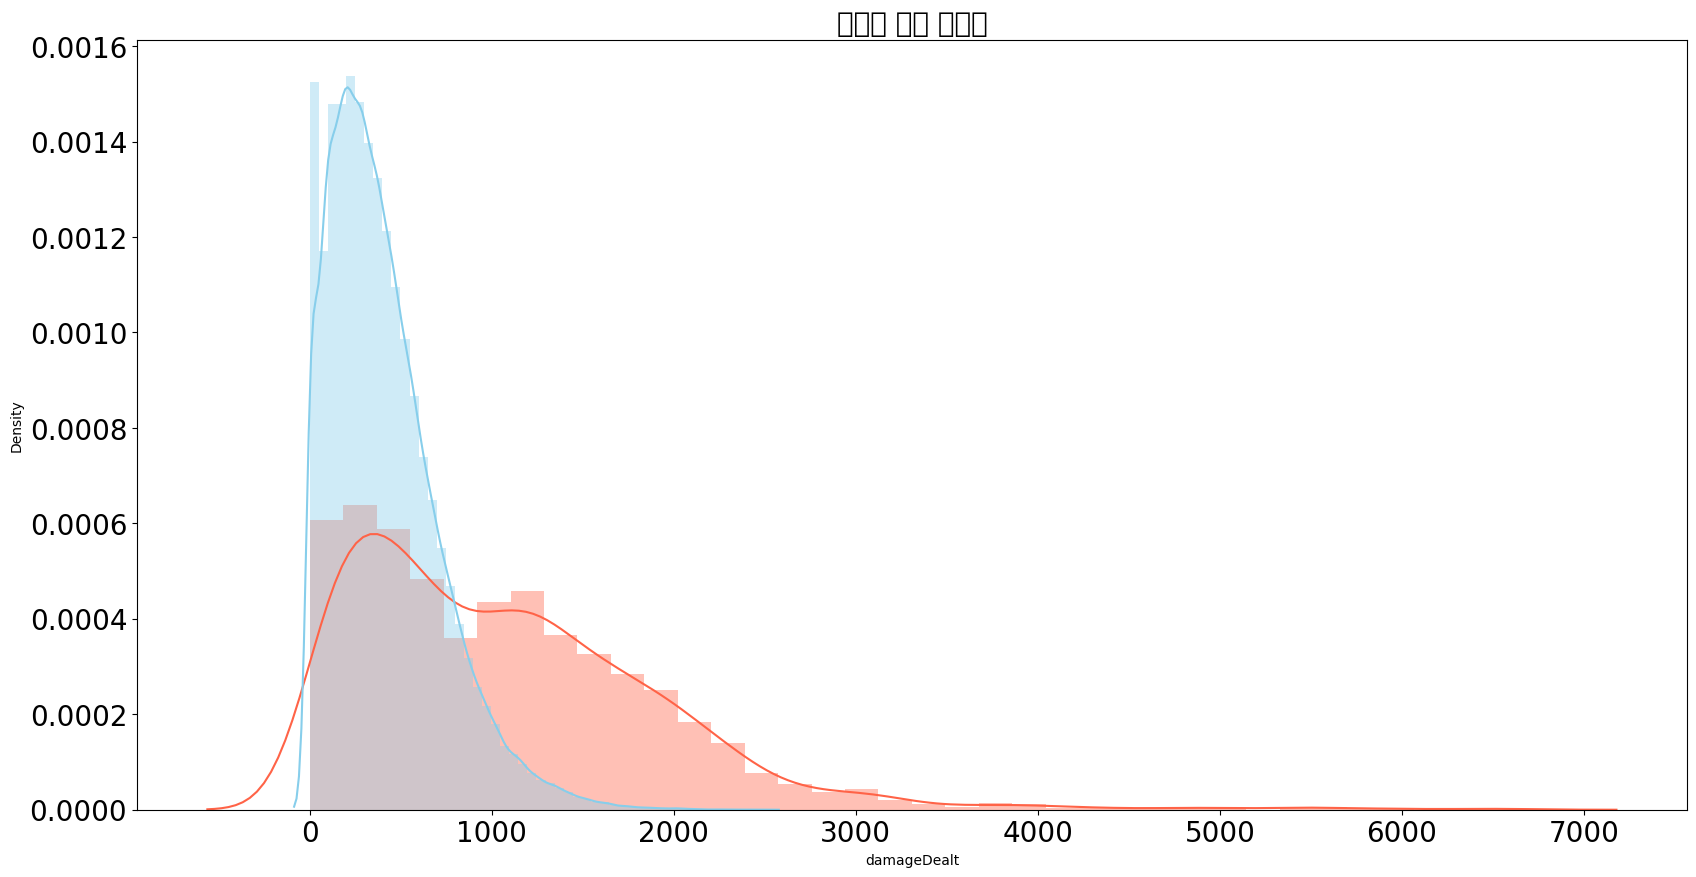

In [59]:
plt.figure(figsize=(20,10))
plt.title('유저별 입힌 데미지', fontsize=20)
sns.distplot(itrain[(itrain['isolation'] == -1)]['damageDealt'], color='tomato')
sns.distplot(itrain[(itrain['isolation'] == 1)]['damageDealt'], color='skyblue')
plt.xticks(fontsize=20); plt.yticks(fontsize=20)

- 빨간색 분포가 이상치 유저이다. 전체적으로 높은 데미지 분포를 가지고 있다.

### 헤드샷 분석

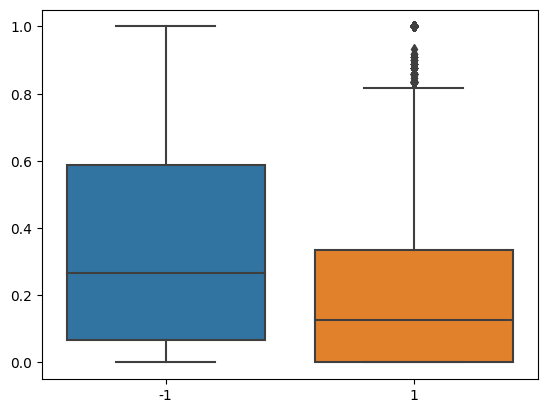

In [65]:
idx = np.arange(0, 2)
labels = ['-1', '1']

sns.boxplot([itrain[(itrain['isolation'] == -1)]['aim_point'] ,itrain[(itrain['isolation'] == 1)]['aim_point']])
plt.xticks(idx, labels)

plt.show()

- 이상치 유저의 헤드샷 비율이 확연히 더 높은것을 알 수 있다.

### 등수 분석

<ipython-input-61-e4f480890a9f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itrain[(itrain['isolation'] == -1)]['maxPlace'], color='tomato')
<ipython-input-61-e4f480890a9f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itrain[(itrain['isolation'] == 1)]['maxPlace'], color='skyblue')


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.12, '0.12'),
  Text(0, 0.14, '0.14'),
  Text(0, 0.16, '0.16'),
  Text(0, 0.18, '0.18')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*arg

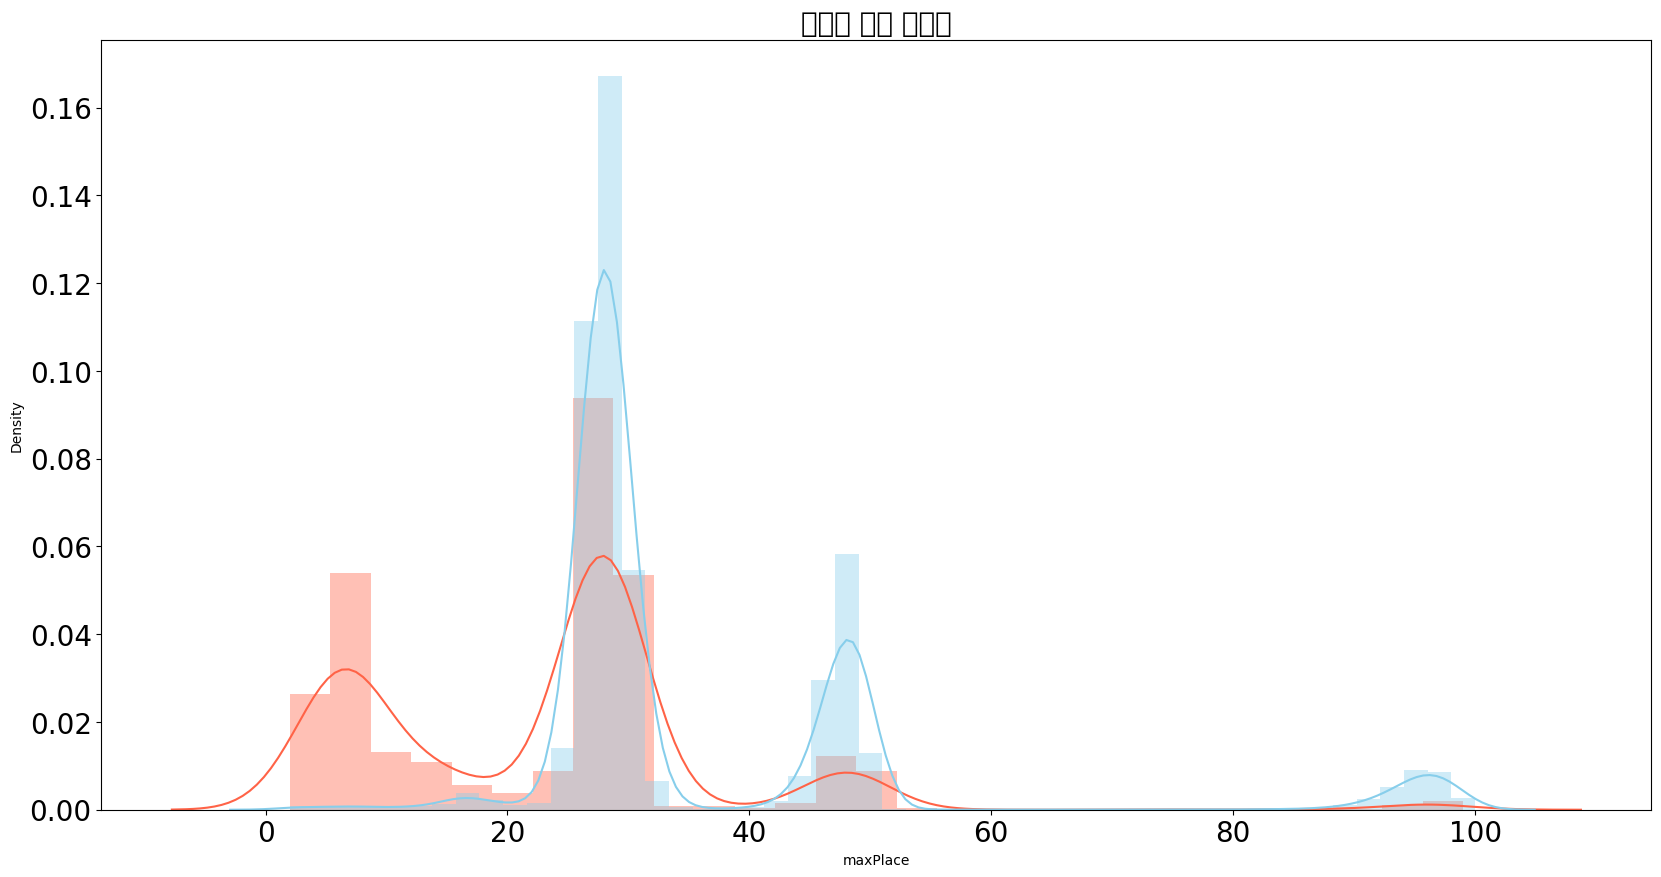

In [61]:
plt.figure(figsize=(20,10))
plt.title('유저별 입힌 데미지', fontsize=20)
sns.distplot(itrain[(itrain['isolation'] == -1)]['maxPlace'], color='tomato')
sns.distplot(itrain[(itrain['isolation'] == 1)]['maxPlace'], color='skyblue')
plt.xticks(fontsize=20); plt.yticks(fontsize=20)

- 이상치 유저들의 최대 예상 점수가 0에 많이 몰려있다.
- 높은 등수가 예상되는 것으로 보아, 이전 게임 기록이 좋았음을 예상할 수 있다.

### 거리 분석

<ipython-input-62-e69f98c1998c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itrain[(itrain['isolation'] == -1)]['walkDistance'], color='tomato')
<ipython-input-62-e69f98c1998c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itrain[(itrain['isolation'] == 1)]['walkDistance'], color='skyblu

(array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]),
 [Text(0, 0.0, '0.0000'),
  Text(0, 0.0001, '0.0001'),
  Text(0, 0.0002, '0.0002'),
  Text(0, 0.00030000000000000003, '0.0003'),
  Text(0, 0.0004, '0.0004'),
  Text(0, 0.0005, '0.0005'),
  Text(0, 0.0006000000000000001, '0.0006')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*arg

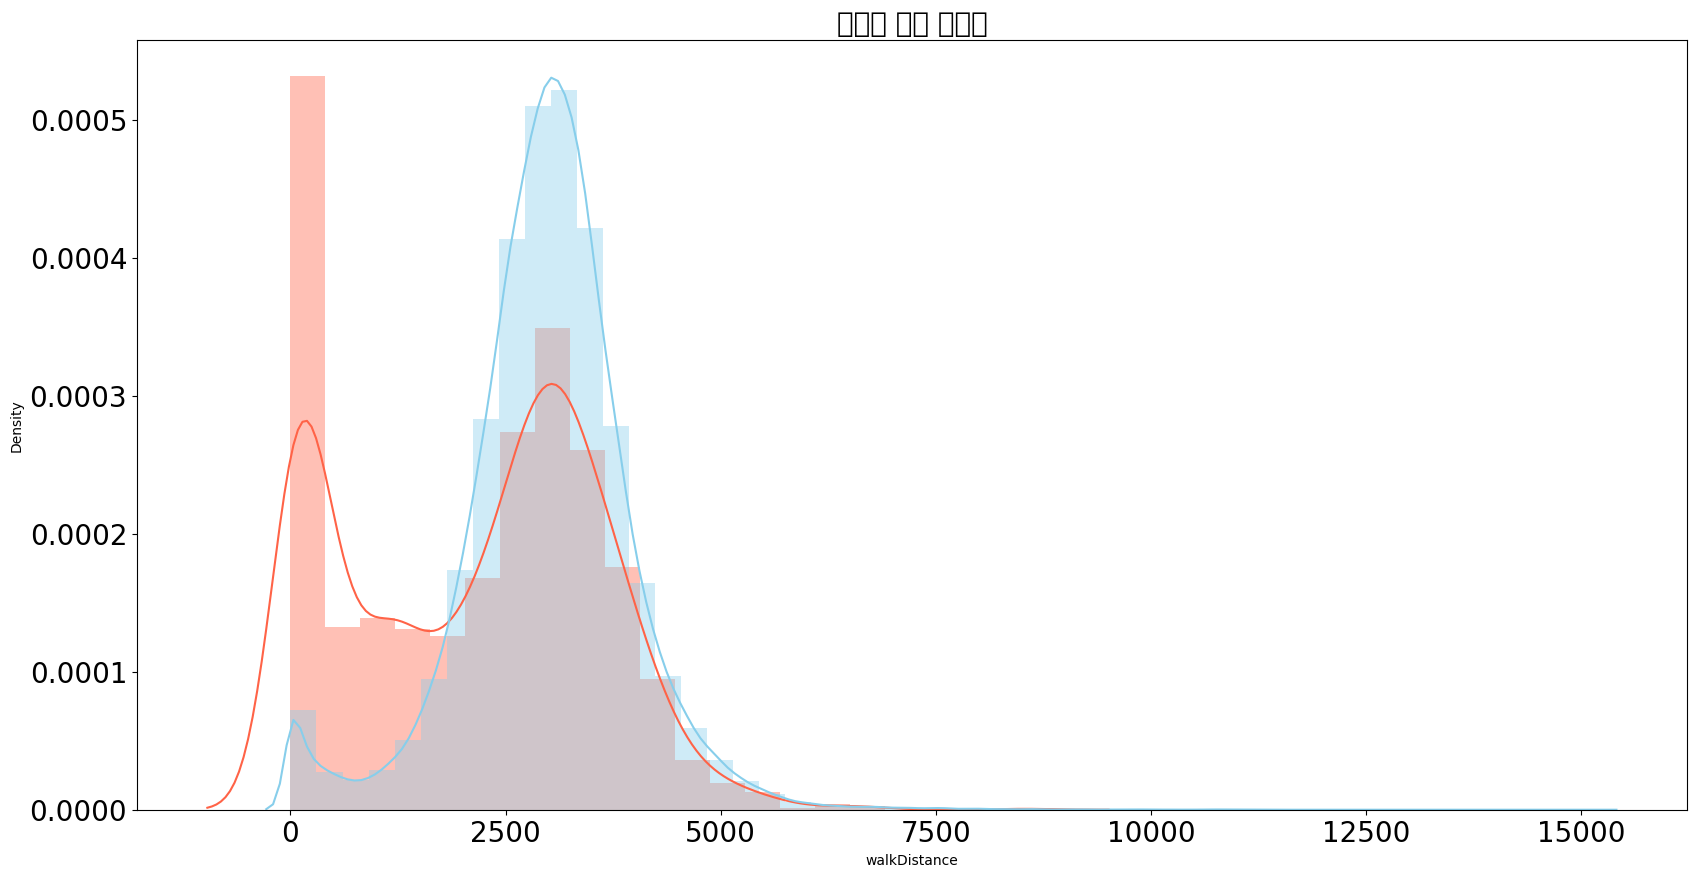

In [62]:
plt.figure(figsize=(20,10))
plt.title('유저별 입힌 데미지', fontsize=20)
sns.distplot(itrain[(itrain['isolation'] == -1)]['walkDistance'], color='tomato')
sns.distplot(itrain[(itrain['isolation'] == 1)]['walkDistance'], color='skyblue')
plt.xticks(fontsize=20); plt.yticks(fontsize=20)

- 이상치 유저들은 걸어서 이동한 거리가 상대적으로 낮게 분포한다.

# 결론

[ EDA를 통한 Insight]
- 핵 유저는 파밍을 덜 한다.
- 총 파밍만 하기 때문에, 수류탄을 잘 사용하지 않는다. 따라서 동시 처지 횟수가 낮다.
- 소생, 회복 등 돕는 횟수가 적다.
- 핵 유저는 처치횟수 등수가 정상 유저에 비해 더 높은 편에 속한다.
- 정상 유저는 처지 등수가 낮음에도 불구하고 치킨을 먹는 경우가 종종있다. 즉, 존버는 승리한다.

[ IsolateForest를 통한 결론 ]
- 이상치 유저들은 짧은 시간안에 동시처치(Ex: 수류탄과 같은 광역 무기)가 높은편에 분포한다.
- 이상치 유저들은 타유저에 비해 입힌 데미지가 높은 편이다.
- 이상치 유저들은 헤드샷 비율이 높다.
- 이상치 유저들은 이동거리가 짧다.


# 회고

- 분산분석시 비모수검정에서 크루스칼왈리스 중위수 검정은 사후검정을 할 수 가 없다는 것을 알게됨.
- 두 집단씩 나눠서 Mann Whiteny U-test를 실시해야 한다.
- 등분산성을 만족하지 않는다면 welch ttest를 실시한다.

- 더 다양한 게임데이터로 분석을 맘껏 해보고 싶다.... 예를들면 경매장 시세분석? 유저 매크로 분석? 유저 특징 분석? 게임 이탈 요인분석?...etc 너무 다양할거 같아서 더 하고 싶다..